In [15]:
import pandas as pd
import numpy as np
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

In [19]:
#from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
credit = pd.read_csv('Credit.csv')

In [29]:
credit = pd.get_dummies(credit, columns = ["Own","Student","Married","Region"],
dtype=int,drop_first = True)
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Balance,Own_Yes,Student_Yes,Married_Yes,Region_South,Region_West
0,14.891,3606,283,2,34,11,333,0,0,1,1,0
1,106.025,6645,483,3,82,15,903,1,1,1,0,1
2,104.593,7075,514,4,71,11,580,0,0,0,0,1


In [31]:
#Initialization variables Best Subset
Y = credit.Balance
X = credit.drop(columns = 'Balance', axis = 1)
model = LinearRegression()
# Running Best subset Regression
sfs_bestsubset = EFS(model, min_features=1, max_features=11, scoring='r2', cv=5)
sfs_bestsubset.fit(X, Y)
print('Best accuracy score: %.2f' % sfs_bestsubset.best_score_)
print('Best subset (indices):', sfs_bestsubset.best_idx_)
#Listing the best subset
print('Best subset (corresponding names):', sfs_bestsubset.best_feature_names_)

Features: 2047/2047

Best accuracy score: 0.95
Best subset (indices): (0, 1, 2, 3, 4, 7)
Best subset (corresponding names): ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes')


In [33]:
# Running Forward Stepwise Regression - Need to set 'forward' to True
sfs_forward = SequentialFeatureSelector(model, k_features='best', forward=True,
floating=False, scoring='r2', cv=5)
sfs_forward.fit(X, Y)

#Listing the selected feature indices at each step for forward stepwise Regression:
sfs_forward.subsets_

#Printing the best forward selection features
print("Forward Selection - Selected Features:", sfs_forward.k_feature_names_)

#Getting prediction score for best selected features for forward selection
print('forward score:', sfs_forward.k_score_)

Forward Selection - Selected Features: ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes')
forward score: 0.9515414705653548


In [35]:
# Running backward Stepwise Regression - Need to set 'forward' to False
sfs_backward = SequentialFeatureSelector(model, k_features='best', forward=False,
floating=False, scoring='r2', cv=5)
sfs_backward.fit(X, Y)
#Listing the selected feature indices at each step for backward stepwise Regression:
sfs_backward.subsets_
#Printing the best backward selection features
print("Backward Selection - Selected Features:", sfs_backward.k_feature_names_)

Backward Selection - Selected Features: ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes')


In [37]:
#Selecting the best k number of selected set of features for forward selection - Example k=3
sfs_forward = SequentialFeatureSelector(model, k_features=3, forward=True, floating=False,
scoring='r2', cv=5)
sfs_forward.fit(X, Y)
sfs_forward.k_feature_idx_

(0, 2, 7)

In [39]:
#Printing the first the best k features
print('Forward selection Best subset (corresponding names):', sfs_forward.k_feature_names_)


Forward selection Best subset (corresponding names): ('Income', 'Rating', 'Student_Yes')


In [41]:
#Printing the first the best k features
print('Backward selectionBest subset (corresponding names):', sfs_backward.k_feature_names_)

Backward selectionBest subset (corresponding names): ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Student_Yes')


In [45]:
#Visualizing Forward selection results in DataFrames
pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(2,)","[0.7407237326341474, 0.7248975847536598, 0.749...",0.73795,"(Rating,)",0.027576,0.021455,0.010728
2,"(0, 2)","[0.8577587529587389, 0.8516767680979662, 0.888...",0.871336,"(Income, Rating)",0.018785,0.014615,0.007308
3,"(0, 2, 7)","[0.9566446620605566, 0.9403639301370201, 0.960...",0.947541,"(Income, Rating, Student_Yes)",0.012301,0.009571,0.004785


In [47]:
#Visualizing Backward selection results in DataFrames
pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)","[0.9577908780308458, 0.9474662999599044, 0.965...",0.950649,"(Income, Limit, Rating, Cards, Age, Education,...",0.013089,0.010183,0.005092
10,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10)","[0.9583833393264942, 0.9483092945635292, 0.965...",0.950925,"(Income, Limit, Rating, Cards, Age, Education,...",0.012987,0.010104,0.005052
9,"(0, 1, 2, 3, 4, 5, 7, 9, 10)","[0.9583611188520649, 0.9484428246295533, 0.965...",0.951068,"(Income, Limit, Rating, Cards, Age, Education,...",0.012688,0.009872,0.004936
8,"(0, 1, 2, 3, 4, 7, 9, 10)","[0.9583742396420278, 0.9490539116287924, 0.964...",0.951205,"(Income, Limit, Rating, Cards, Age, Student_Ye...",0.012616,0.009815,0.004908
7,"(0, 1, 2, 3, 4, 7, 9)","[0.9579631467025298, 0.9487552740452087, 0.965...",0.951356,"(Income, Limit, Rating, Cards, Age, Student_Ye...",0.012535,0.009752,0.004876
6,"(0, 1, 2, 3, 4, 7)","[0.9580046165676231, 0.9492298699636939, 0.965...",0.951541,"(Income, Limit, Rating, Cards, Age, Student_Yes)",0.012502,0.009727,0.004863
5,"(0, 1, 3, 4, 7)","[0.9564590574708799, 0.9517819620241795, 0.964...",0.951166,"(Income, Limit, Cards, Age, Student_Yes)",0.012499,0.009725,0.004862
4,"(0, 1, 3, 7)","[0.95564231752239, 0.9511325870086168, 0.96457...",0.950652,"(Income, Limit, Cards, Student_Yes)",0.012406,0.009652,0.004826
3,"(0, 1, 7)","[0.9542263819762833, 0.9469098083489705, 0.956...",0.945932,"(Income, Limit, Student_Yes)",0.013434,0.010452,0.005226
2,"(0, 1)","[0.8565793925794394, 0.8605549030280242, 0.872...",0.866297,"(Income, Limit)",0.013519,0.010519,0.005259


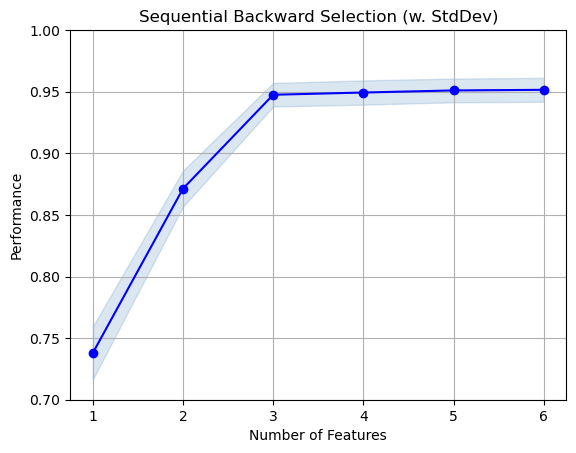

In [49]:
#Plotting results for model selection
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
#Plotting the results for forward selection when k = 6
sfs_forward = SequentialFeatureSelector(model, k_features=6, forward=True, floating=False,
scoring='r2', cv=5)
sfs_forward.fit(X, Y)
fig1 = plot_sfs(sfs_forward.get_metric_dict(), kind='std_dev')
plt.ylim([0.7, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

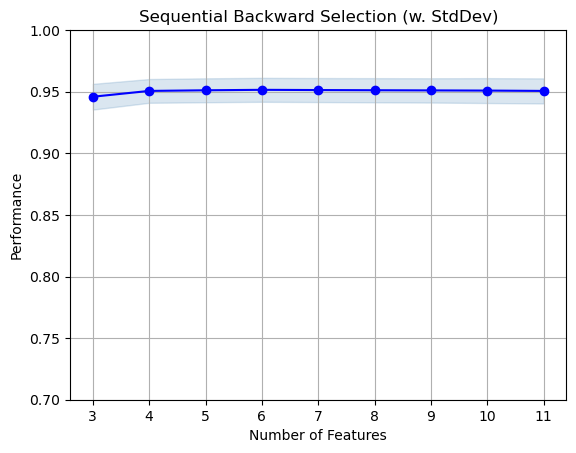

In [51]:
#Plotting the results for backward selection when k = 6
sfs_backward = SequentialFeatureSelector(model, k_features=3, forward=False, floating=False,
scoring='r2', cv=5)
sfs_backward.fit(X, Y)
fig1 = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.ylim([0.7, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()